In [16]:
from collections import defaultdict
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import scipy.signal as signal
plt.rcParams["figure.figsize"] = (6.4*2,4.8*1.5)
plt.rcParams["figure.dpi"] = 200
from dsp import util
import json

Fs = 150e6/8/256

## Gaussian Windows

0.9999992187848458

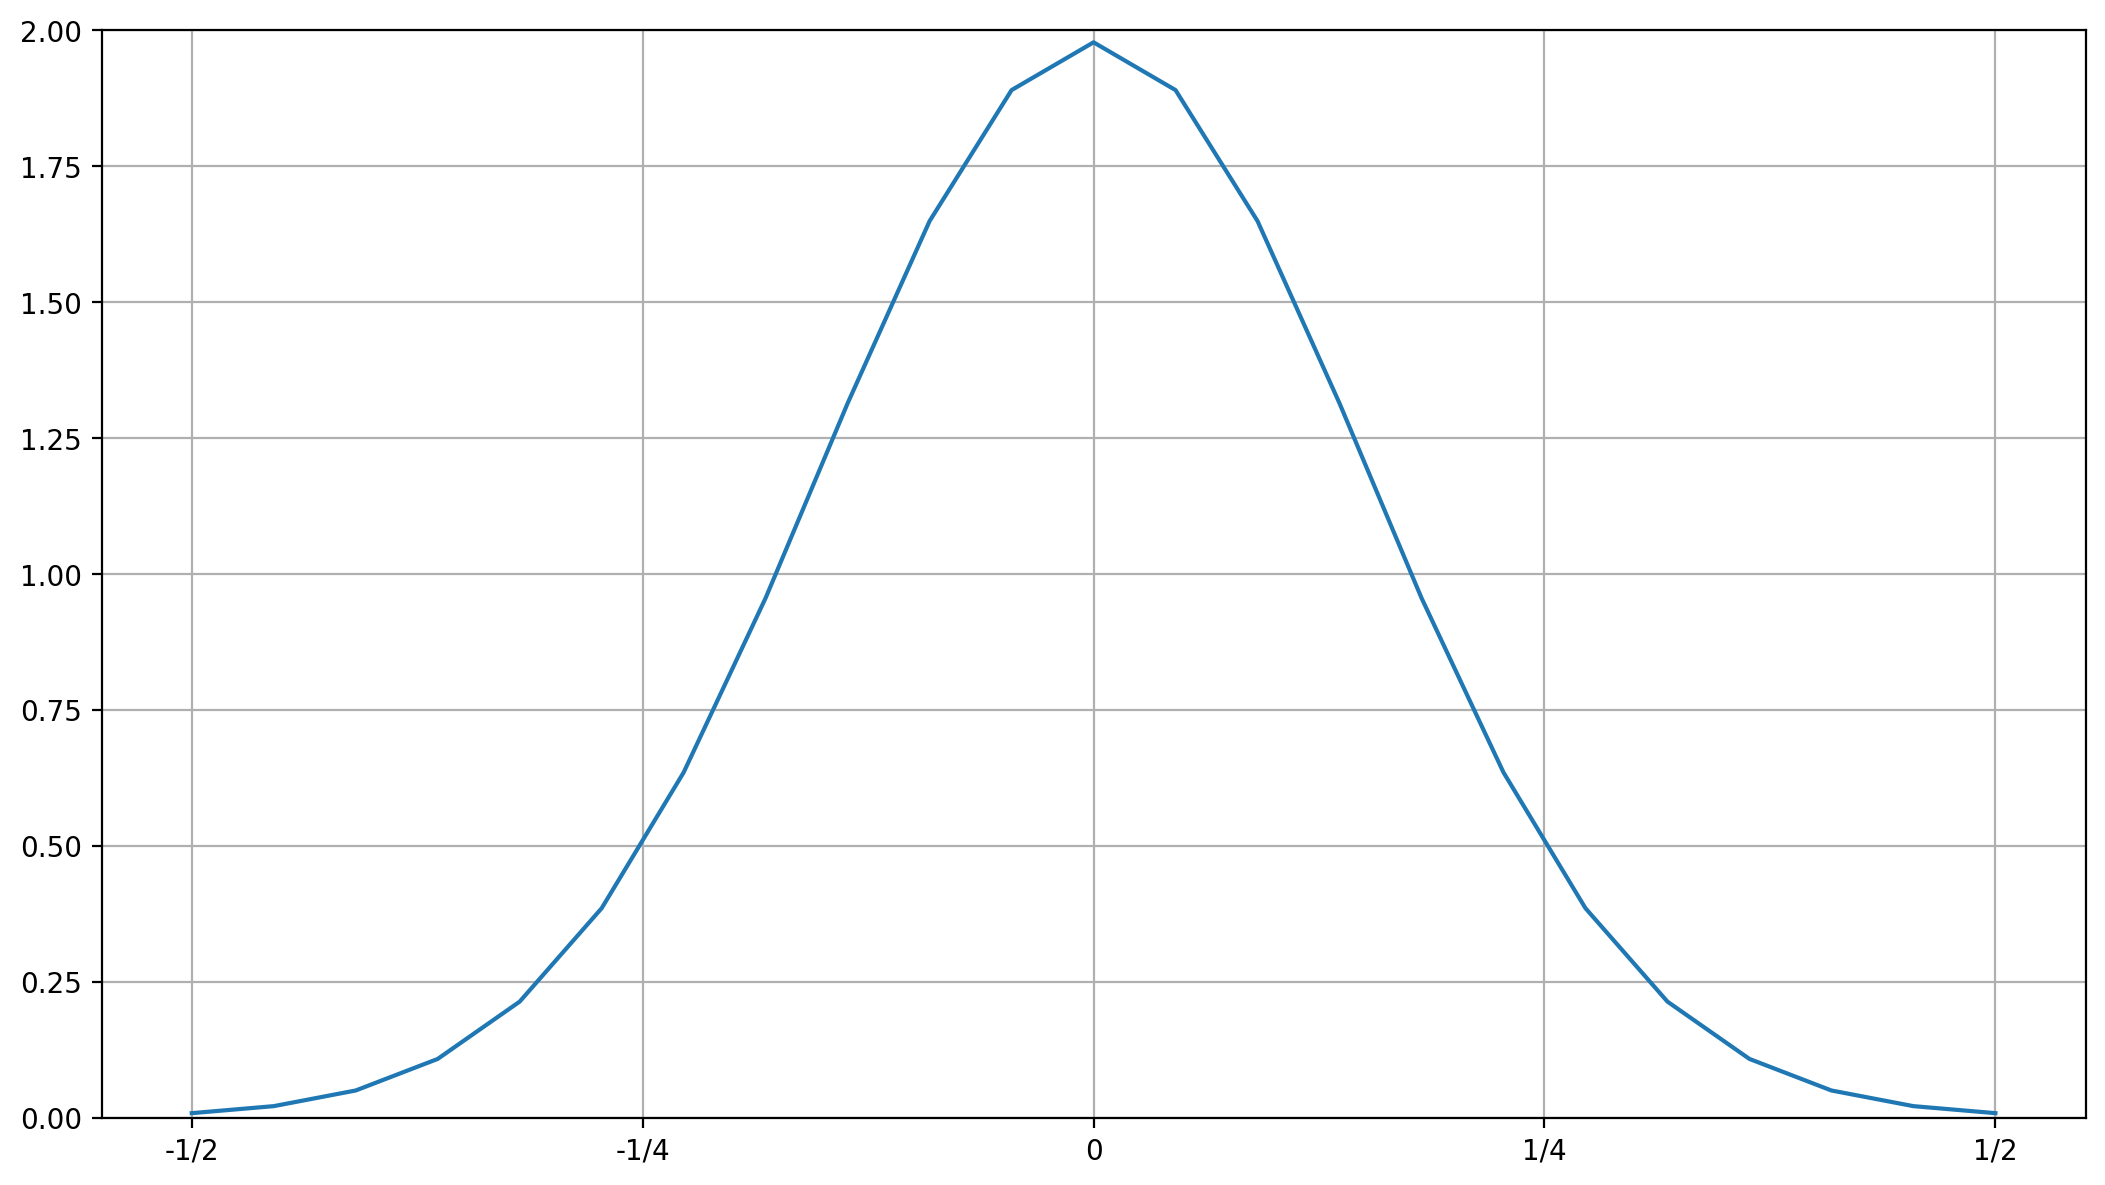

In [17]:
M = 23
s= (M - 1) // 2
t = np.linspace(-s, s, num=M) / (M - 1)
w = np.sqrt(M)/(s*np.pi)**(1/4)*np.exp(-(s*t)**2 * 2 / s)
plt.plot(t, w)
winsupport = np.linspace(-1/2, 1/2, 3)
plt.xticks(np.linspace(-1/2, 1/2, 5), labels=['-1/2', '-1/4', '0', '1/4', '1/2'])
plt.grid(True)
#plt.xlim(-1/2, 1/2)
plt.ylim(0, 2)

1 / M * np.sum(w**2) 

## Rectangular Window

9
mag power=1.0


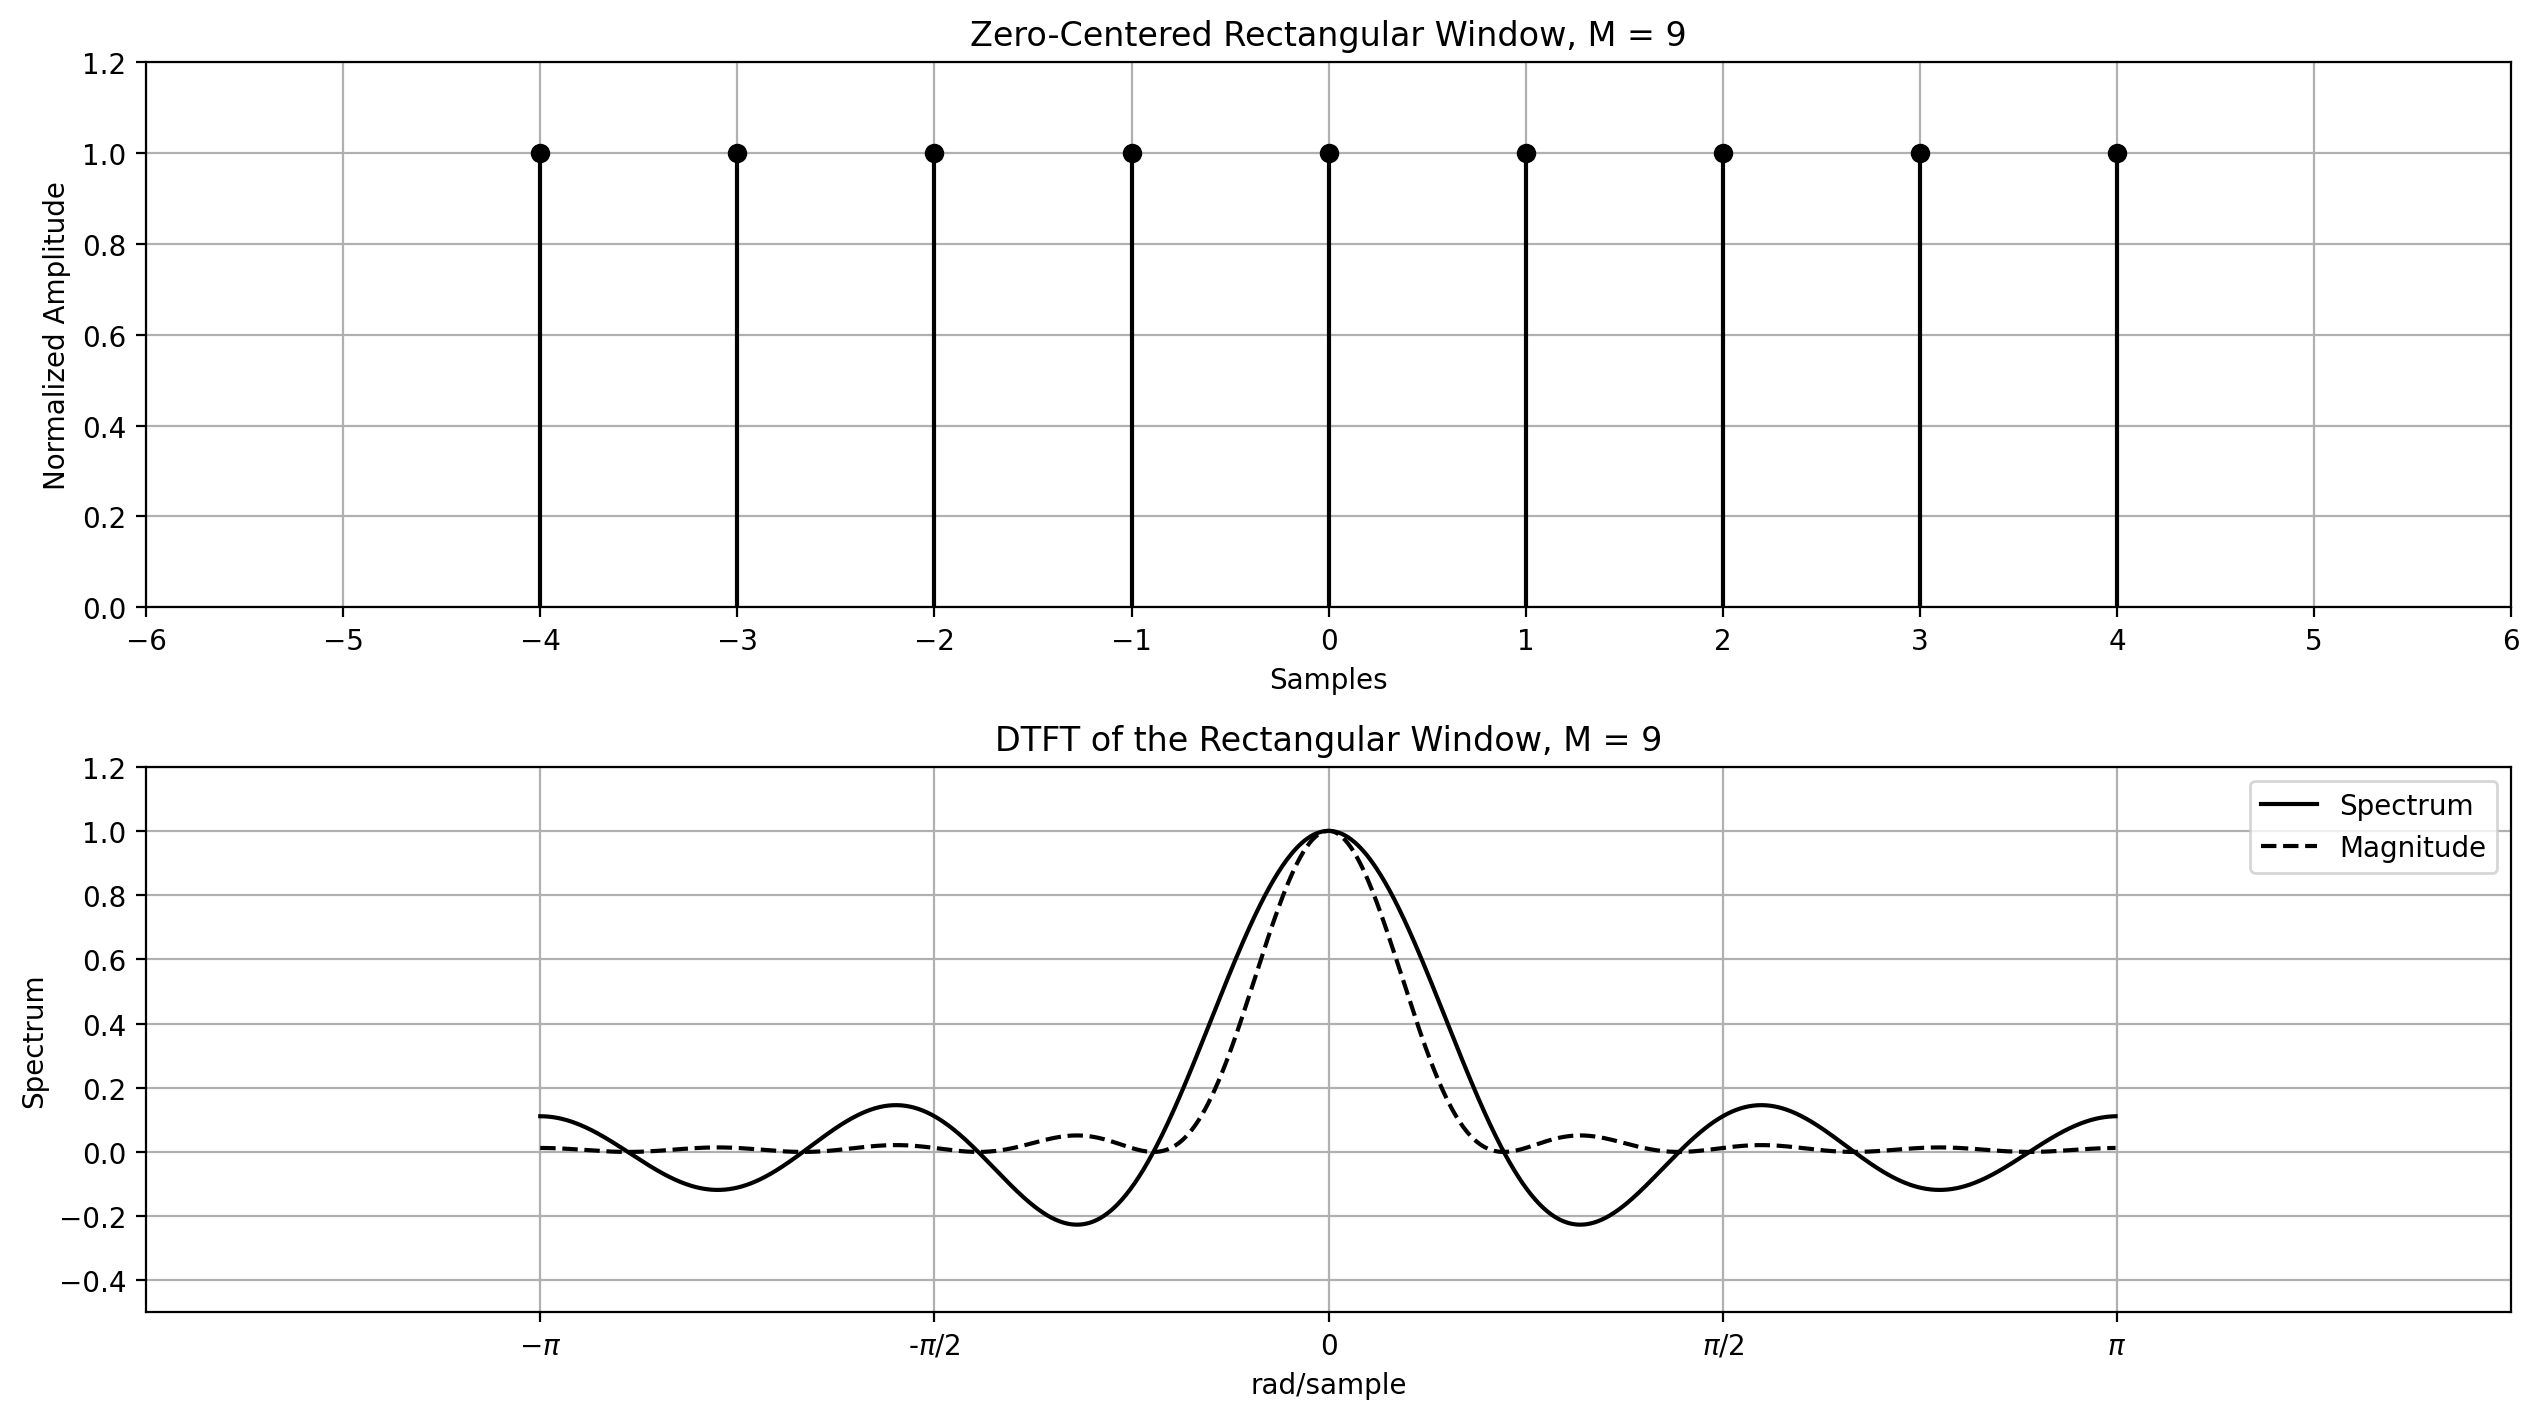

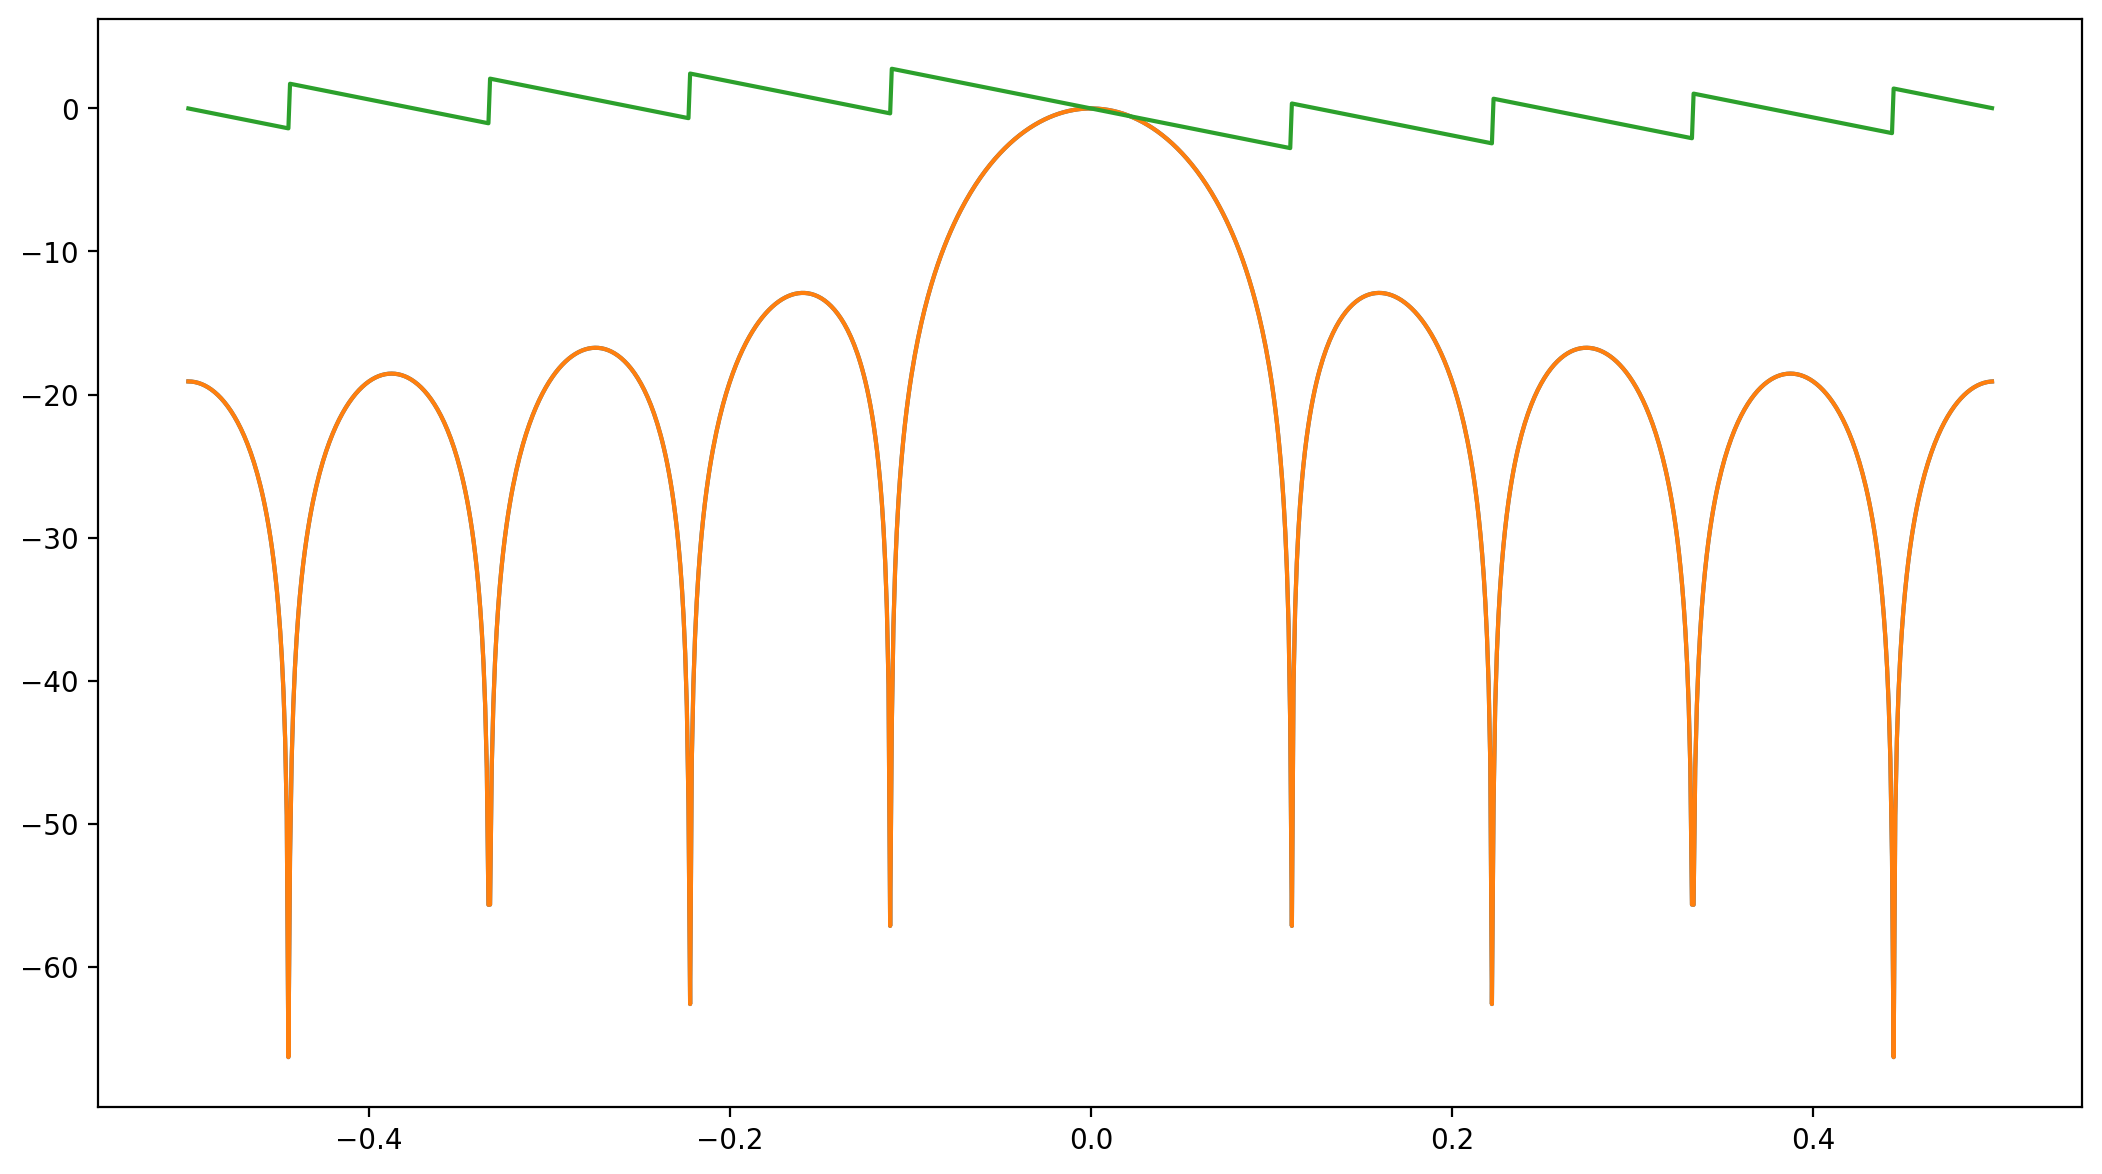

In [18]:
M = 9
Nw = 1101
M2 = int((M-1) // 2)
#k = np.linspace(-M2, M2, num=M).astype(int)
# frequencies to sample the asianc function
w  =  np.linspace(-np.pi, np.pi, num=Nw, endpoint=False)
nw  =  w / 2 / np.pi
#k = np.arange(-M2, M2).astype(int)
print(M)
#spectrum = np.sinc(np.pi * k / M2)
specnorm = util.asinc(M, w)
#spectrum = np.sinc(4 * np.pi * k / M).astype(complex)
#spectrum = np.sqrt(m) * np.sinc(16 * k)
spectrum = np.nan_to_num(specnorm, copy=True, nan=1) * M / np.sqrt(M)
mag = np.abs(spectrum)
power = mag**2
#plt.figure()
db = 10*np.log10(power)
db -= np.max(db)
fig, ax = plt.subplots(2)
axtwin = ax[0]
axspecnorm = ax[1]

fig.set_tight_layout(True)
t = np.linspace(-M2, M2, num=M)
win = np.ones(M)
axtwin.vlines(t, 0, win, 'black')
axtwin.plot(t, win, 'o', color='black', label='Window Amplitude')
axtwin.set_xticks(np.arange(-M, M))
axtwin.set_title("Zero-Centered Rectangular Window, M = 9")
axtwin.set_xlabel("Samples")
axtwin.set_ylabel("Normalized Amplitude")
axtwin.grid(True)
#axtwin.set_xlim(-M, M)
axtwin.set_xlim(-6, 6)
axtwin.set_ylim(0, 1.2)
#axtwin.legend()
axspecnorm.plot(nw, specnorm, 'black', label='Spectrum')
#axspecnorm.plot(nw, np.exp(-1j*(M-1)/2*w)*specnorm, label='Causal Spectrum')
axspecnorm.set_title("DTFT of the Rectangular Window, M = 9")
axspecnorm.set_xlabel("rad/sample")
axspecnorm.set_ylabel("Spectrum")
axspecnorm.grid(True)
axspecnorm.set_xlim(-0.75, 0.75)
axspecnorm.set_xticks(np.linspace(-0.5,  0.5, 5))
axspecnorm.set_xticklabels([r'$-\pi$', r'-$\pi/2$', '0', r'$\pi/2$', r'$\pi$'])
axspecnorm.set_ylim(-0.5, 1.2)
axspecnorm.plot(nw, power / M, '--', color='black', label='Magnitude')
axspecnorm.legend()

cspectrum = np.exp(-1j*(M-1)/2*w)*spectrum
plt.savefig("rect.svg")
plt.figure()
cdb = 10*np.log10(np.abs(cspectrum)**2)
cdb -= np.max(cdb)
plt.plot(nw, db, label='S')
plt.plot(nw, cdb, label='CS')
#plt.plot(nw, np.angle(spectrum), label='Angle(S)')
plt.plot(nw, np.angle(cspectrum), label='Angle(CS)')
#plt.plot(nw, specnorm, mcolors.CSS4_COLORS["darkkhaki"])
#plt.plot(nw, np.angle(spectrum) / np.pi, '--r', alpha=0.6)
#plt.plot(nw, power / M)
#plt.plot(nw, db / 30 + 1, mcolors.CSS4_COLORS["lightgray"])
#plt.plot(w, mag, mcolors.CSS4_COLORS["dimgrey"])
#plt.ylim(-0.5, 1.2)
#plt.xlim(-1, 1)
#plt.grid(True)
#plt.figure()
#plt.ylabel('Phase')
#plt.xlabel('fs (rad/sample)')
#plt.grid(True)
#plt.plot(w, np.angle(spectrum))
#plt.xlim(-1, 1)
#plt.ylim(0, 1.5*np.pi)
print(f'mag power={1 / Nw * np.sum(power)}')

In [19]:
def mag_to_db(mag):
	return 10*np.log10(mag**2)

def db_to_mag(db):
	return 10**(db/20)

def norm_to_rad(normphase):
	return normphase*np.pi

def rad_to_norm(radphase):
	return radphase/np.pi

def db_to_rad(db):
	return 

def rad_to_db(rad):
	return mag_to_db(rad/np.pi)

In [20]:
def find_sidelobe(psd, p=0):
	pidx, pinfo = signal.find_peaks(psd[psd.size//2+1:])
	pidx += psd.size//2+1
	idx = pidx[:p]
	height = psd[idx]
	return idx, height

5
[-12.89590342 -16.73156172]


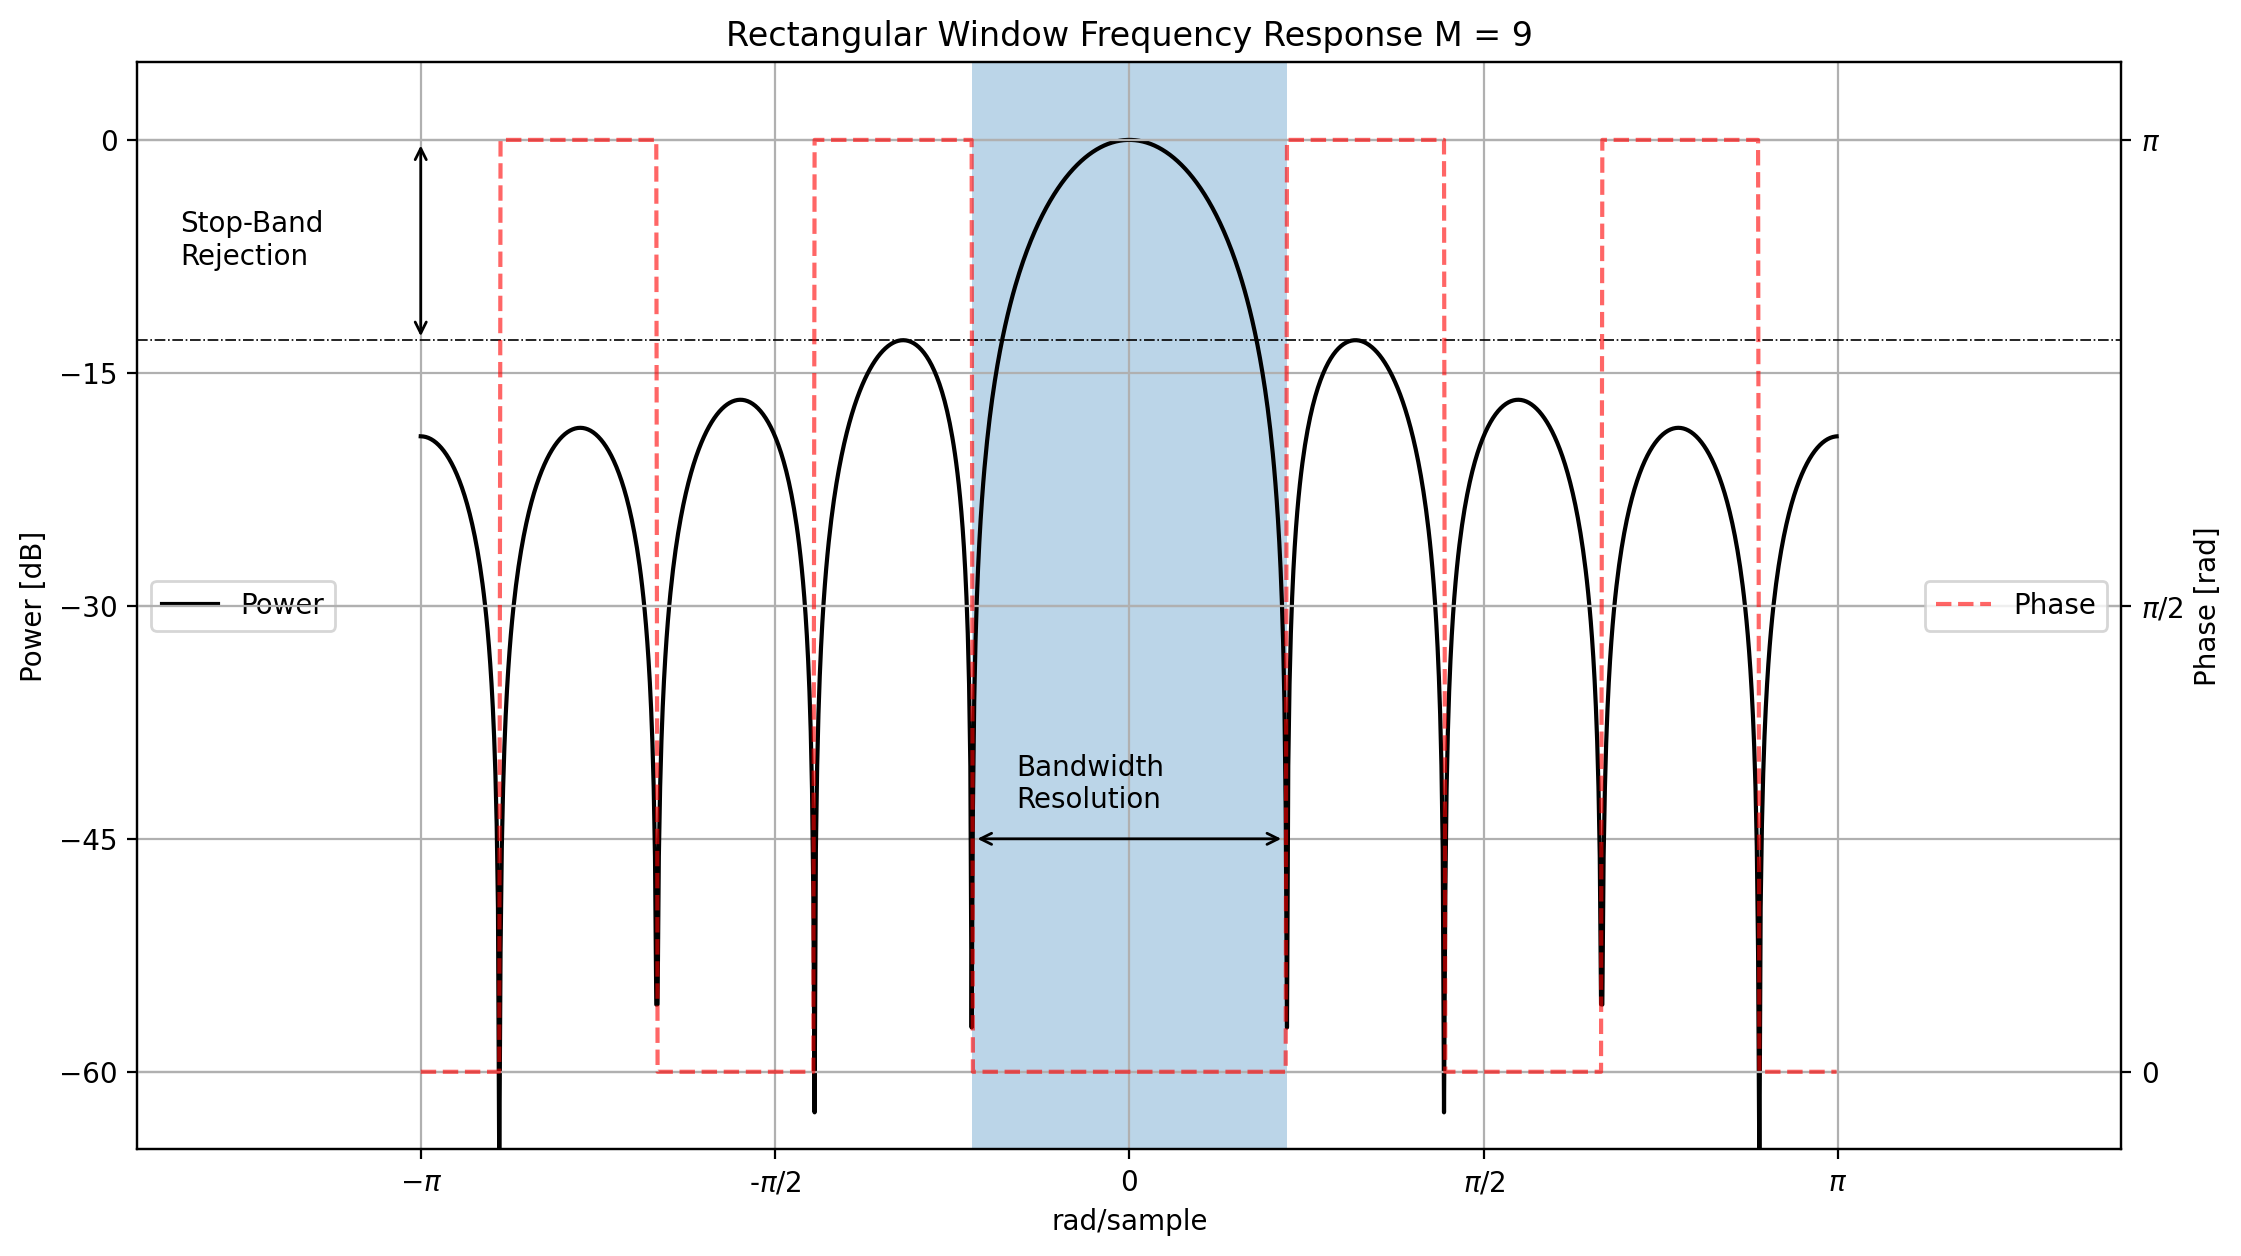

In [21]:
fig2, ax2= plt.subplots(1)

axmag = ax2
axphase = axmag.twinx()
cspectrum = np.exp(-1j*(M-1)/2*w)*spectrum
axphase.plot(nw, np.angle(spectrum) / np.pi, '--r', alpha=0.6, label='Phase')
#axphase.plot(nw, np.angle(cspectrum) / 2 / np.pi+np.pi, '--', alpha=0.6, label='Phase')

axmag.plot(nw, db, 'black', label='Power')
#axmag.plot(nw, np.exp(-1j*(M-1)/2)* specnorm, label='Power  2')
axmag.grid(True)
axmag.axvspan(-1/M, 1/M, alpha=0.3)
axmag.set_xlim(-1,1)
axmag.set_ylim(-65, 5)
axmag.set_title(('Rectangular Window Frequency Response M = 9'))
#axphase = ax2.secondary_yaxis('right', functions=(db_to_mag, mag_to_db))
axmag.set_yticks(np.linspace(-60, 0, 5))
axmag.set_xticks([-1, -0.5, 0, 0.5, 1])
radticks = [r'$-2\pi$', r'$-\pi$', '0', r'$\pi$', r'$2\pi$']
print(len(radticks))
axmag.set_xlim(-0.5, 0.5)
axmag.set_xticks(np.linspace(-0.5,  0.5, 5))
axmag.set_xticklabels([r'$-\pi$', r'-$\pi/2$', '0', r'$\pi/2$', r'$\pi$'])
#normticks = [r'$f_{s}$', r'$\frac{1}{2}f_{s}$', '0', r'$\frac{1}{2}f_{s}$', r'$f_{s}$']
#print(len(normticks))
#axmag.set_xticklabels([rad + ' (' + norm + ')' for rad, norm in zip(radticks, normticks) if str(rad)])
#axmag.set_xticklabels([rad for rad in radticks])

axmag.set_ylabel("Power [dB]")
axphase.set_ylabel("Phase [rad]")
axmag.set_xlabel("rad/sample")
axphase.set_yticks(np.linspace(0, 1, 3))
axphase.set_yticklabels(['0', r'$\pi/2$', r'$\pi$'])
axphase.set_ylim(-1/12, 1+1/12)
axphase.grid(True)
idx, height = find_sidelobe(db, 2)
axmag.axhline(height[0], ls = '-.', color = 'black', lw=0.6)
print(height)
axmag.legend(loc='center left')
axphase.legend(loc='center right')
#axphase.legend()
#plt.plot(nw, np.angle(cspectrum) / np.pi, label='Angle(CS)')

#fig2.legend()
#radticks = axmag.secondary_xaxis(-0.1)
#radticks.set_xticks([-1, -0.5, 0, 0.5, 1])
#radticks.set_xticklabels([r'$-2\pi$', r'$-\pi$', '0', r'$\pi$', r'$2\pi$'])

#normticks = axmag.secondary_xaxis(-0.1)
#normticks.set_xticks([-1, -0.5, 0, 0.5, 1])
#normticks.set_xticklabels([r'$-2\pi$', r'$-\frac{\pi}{2}$', '0', r'$+\frac{\pi}{2}$', r'$2\pi$'])
axmag.annotate('', (-1/M, -45), (1/M, -45), arrowprops=dict(arrowstyle='<->'))
axmag.annotate('Bandwidth\nResolution', (-0.08, -43))
'Stop-Band\nRejection'
axmag.annotate('', (-0.5, -13), (-0.5, 0), arrowprops=dict(arrowstyle='<->'))
axmag.annotate('Stop-Band\nRejection', (-0.67, -8))
axmag.set_xbound(-0.7, 0.7)
fig2.savefig("rectmag.svg")
pass